In [1]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sparse_dot_topn import awesome_cossim_topn 
import re

from sklearn.feature_extraction.text import TfidfVectorizer
from deduping_module import deduping_class

In [2]:
link = r'C:\Users\User\Legalmatch\Finance and Data Analysis Team - Sales Ops\Projects\SAL-230_Revisit validity - latest'
gt = pd.read_csv(link + '\\raw\sf_export.csv', encoding='latin-1')
nm = pd.read_csv(link + '\\Texas\\texas-00001 - step 1.csv', encoding='latin-1')
# nm = pd.read_csv('non_match_step 2.csv', encoding='latin-1')
# nm = pd.read_csv('non_match_step 3.csv', encoding='latin-1')
# nm = pd.read_csv('non_match_step 4.csv', encoding='latin-1')
# nm = pd.read_csv('non_match_step 6.csv', encoding='latin-1')
# nm = pd.read_csv('non_match_step 9.csv', encoding='latin-1')
# nm = pd.read_csv('non_match_step 11.csv', encoding='latin-1')
# nm = pd.read_csv('non_match_step 13.csv', encoding='latin-1')
nm = nm[[col for col in nm.columns if 'Unnamed' not in col]]

step_number = "step 2"
# step_number = "step 3"
# step_number = "step 4"
# step_number = "step 6"
# step_number = "step 9"
# step_number = "step 11"
# step_number = "step 13"
# step_number = "step 15"

#### Initializing the module

In [3]:
# initializing the module
# Step 2 to 6
# deduping = deduping_class(gt, 'account') 

# Step 7 to 15
deduping = deduping_class(gt, 'contact')

#### Step 1:
1. Make sure that the ground truth columns are similar with the dataframe to be matched

In [4]:
# matching the ground truth columns with the to match dataframe
nm.rename(columns={'firstName':'First Name', 'lastName':'Last Name', 'email':'Email', 'phone':'Phone', 'zip':'Zip Code 1', 'First and Last':'Account Name', 'street':'Street Address 1', 'state':'State 1'}, inplace= True)

In [5]:
nm.fillna('', inplace= True)

In [6]:
nm.head(2)

,Account Name,First Name,Last Name,suffix,status,Phone,phoneExt,fax,Web,Street Address 1,city,State 1,Zip Code 1,Email,Bar Admission Date,Bar State
0,Thomas Jerome Aaberg,Thomas Jerome,Aaberg,,Eligible to Practice in Texas,940-393-1507,,,,"Wise County Courthouse, Ste 300",Decatur,TX,76234,,1/22/2004,TX
1,Cristina Aalders,Cristina,Aalders,,Eligible to Practice in Texas,281-405-4744,,,,11740 Katy Freeway Energy Tower 3,Houston,TX,77079,,3/15/2012,TX


In [7]:
gt.head(2)

,Salesforce Account Id,Salesforce Contact Id,Account Name,First Name,Last Name,Email,Phone,Street Address 1,Zip Code 1,County 1,State 1,Quarantine
0,0014y00002LvzGCAAZ,0034y00002QqcZtAAJ,Melcher Law,Doug,Melcher,NaN,(617) 485-0859,NaN,NaN,NaN,NaN,0.0
1,0014y00002aVeATAA0,0034y00002ZjgTZAAZ,Barbara Wolf,Barbara,Wolf,NaN,(513) 772-6887,102 Hetherington Lane,NaN,NaN,OH,0.0


#### Step 2
Now that the columns are matched, we can use the key_selector function. \
This takes 2 inputs, *args and "data=dataframe to be matched"\
This function will return the to be matched dataframe with primary_key value while also adding it in the ground truth but only in the backend

In [8]:
#step 2
deduping.key_selector('Account Name', 'Street Address 1','State 1', 'Phone', data= nm)
# step 3
# deduping.key_selector('Account Name', 'State 1', 'Phone', data= nm)
#step 4
# deduping.key_selector('Account Name', 'State 1', 'Street Address 1', data= nm)
#step 6
# deduping.key_selector('Street Address 1', 'State 1', 'Phone', data= nm)
#step 9
# deduping.key_selector('First Name', 'Last Name', 'Street Address 1', 'State 1', 'Phone',data= nm)
#step 11
# deduping.key_selector('First Name', 'Last Name', 'State 1', 'Phone',data= nm)
#step 13
# deduping.key_selector('First Name', 'Last Name', 'Phone',data= nm)
#step 15
# deduping.key_selector('Last Name', 'Phone',data= nm)

c:\Users\USER\Legalmatch\Finance and Data Analysis Team - Sales Ops\Projects\SAL-230_Revisit validity - latest\CosineSimilarityDeduping\deduping_module.py:74: FutureWarning: The default value of regex will change from True to False in a future version.
  self.ground_truth['primary_key'] = self.ground_truth['primary_key'].str.replace(r'[^\w\s]+', '')
c:\Users\USER\Legalmatch\Finance and Data Analysis Team - Sales Ops\Projects\SAL-230_Revisit validity - latest\CosineSimilarityDeduping\deduping_module.py:79: FutureWarning: The default value of regex will change from True to False in a future version.
  self.nm['primary_key'] = self.nm['primary_key'].str.replace(r'[^\w\s]+', '')


In [9]:
# deduping.nm['State 1'] = deduping.nm.apply(lambda x: deduping.state_abbrev(x['State 1']), axis= 1)

#### Optional Step
We can set an optional paramater called ngrams, this means the number of combination the txt will be divided. \
if this is not set, it will automatically equal to 3

In [10]:
deduping.set_ngrams(4)

#### Step 3
This function will convert the ground truth and dataframe to be matched in to tfidf sparse matrix \
the input to this function should be the dataframe with the primarykey \
the results will now be included in the class module

self.nm_tfidf\
self.gt_tfidf

In [11]:
deduping.vectorizer()

In [12]:
# deduping.nm_tfidf_df

In [13]:
# deduping.gt_tfidf_df

#### Step 4
This function will get compare the similarities in the 2 dataframe and save the output in self.match

In [14]:
deduping.get_match(1000000)

The top value is not set or the value exceeds the nonzero size


c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexes\base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


In [16]:
print(len(deduping.non_matched_output))
deduping.non_matched_output.to_csv("non_match_" + step_number +".csv")

47105


In [17]:
deduping.matched_output.to_csv("match_" + step_number + ".csv")

In [18]:
len(deduping.matched_output.reset_index(drop=False).drop_duplicates(subset=['index']))

20350

#### Notes:
1. If deduping at account object, always remember to remove the duplicates in the Salesforce Account Id
1. always make sure that the index of the inputs are in numerical order or this will cause errors in getting the matches
1. if a selected key value is missing, it has a significant impact on the performance

<AxesSubplot:xlabel='similarity'>

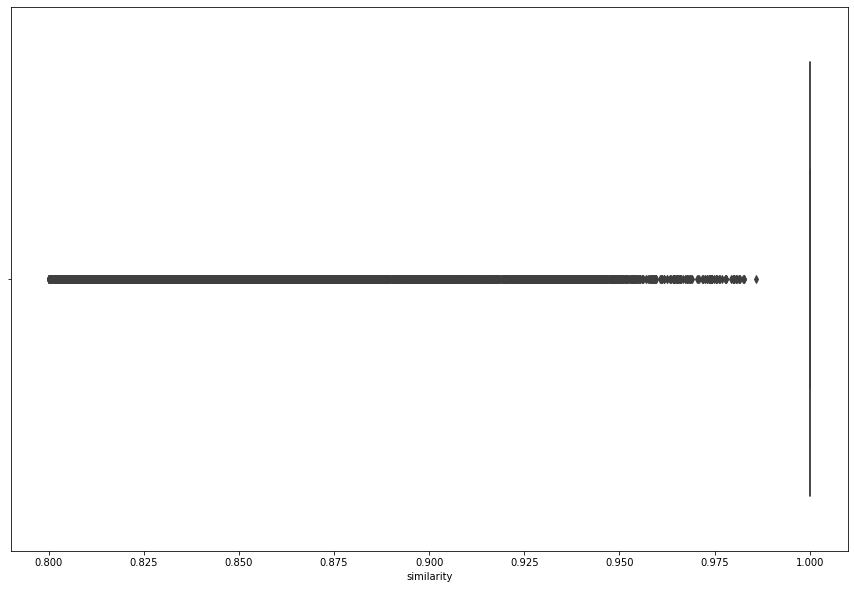

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
sns.boxplot(data=deduping.matched, x='similarity')

In [20]:
# sns.histplot(data=deduping.matched, x='similarity')

In [21]:
deduping.matched.describe()

,similarity
count,21553.000000
mean,0.967285
std,0.061553
min,0.800034
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [22]:
deduping.matched.describe().loc['mean'][0]

0.9672850950669727

#### Chebyshev's Theorem limits

In [23]:
#Lower Limit
lower_limit = deduping.matched.describe().loc['mean'][0] - (2 * deduping.matched.describe().loc['std'][0])

In [24]:

upper_limit = deduping.matched.describe().loc['mean'][0] + (2 * deduping.matched.describe().loc['std'][0])

#### Performance Evaluation

In [25]:
class deduping_performance:
    def __init__(self, nm, deduping_matched):
        try:
            self.df = nm.merge(deduping_matched[['index','Ground Truth ID','similarity']].set_index('index'), left_index= True, right_index=True)
            self.df.sort_values(by='similarity', ascending= False, inplace= True)
            self.df['similarity'] = self.df['similarity'].round(decimals= 3)
            self.df.drop_duplicates(subset=['similarity'], inplace =True)
            self.df.reset_index(drop=True, inplace= True)

            if len(self.df) < 25:
                print('dataframe is less than threshold rows (25)')
                raise ValueError('dataframe is less than threshold rows (25)')

            self.confirmation_list = [range(96,101), range(73,78), range(48,53),range(23,28),range(5)]
            self.get_sample()
        except:
            self.confirmation_df = self.df

    def get_percentile(self, percentile):
        percentile_value = self.df['similarity'].quantile((percentile/100), interpolation='lower')
        return self.df[self.df['similarity'] == percentile_value]

    def get_sample(self):
        temp_list= []
        for range in self.confirmation_list:
            for position in range:
                temp_list.append(self.get_percentile(position))
        self.confirmation_df = pd.concat(temp_list)
        self.confirmation_df.sort_values(by= 'similarity', ascending= False, inplace= True)

        

In [26]:
test = deduping_performance(nm, deduping.matched)

c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexes\base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


In [27]:
len(test.confirmation_df)

25

In [28]:
test.confirmation_df.to_csv("confirmation_df_" + step_number +".csv")

In [29]:
test.confirmation_df

,Account Name,First Name,Last Name,suffix,status,Phone,phoneExt,fax,Web,Street Address 1,city,State 1,Zip Code 1,Email,Bar Admission Date,Bar State,primary_key,Ground Truth ID,similarity
0,Jennifer Coffee,Jennifer,Coffee,,Eligible to Practice in Texas,512-478-2871,,,,2412 Enfield Rd Apt 7,Austin,TX,78703,,5/1/2017,TX,JenniferCoffee2412EnfieldRdApt7TX5124782871,0034y00002Zji00AAB,1.000
2,Kyle Foltyn-Smith,Kyle,Foltyn-Smith,,Eligible to Practice in Texas,310-893-5150,,,,11111 Santa Monica Blvd Ste 620,Los Angeles,CA,90025,,2/3/2022,TX,KyleFoltynSmith11111SantaMonicaBlvdSte620CA310...,0030e00002O74vkAAB,0.983
4,Mark Baggett,Mark,Baggett,,Eligible to Practice in Texas,214-671-8272,,,,"1500 Marilla Street, 7BN",Dallas,TX,75201,,4/20/1990,TX,MarkBaggett1500MarillaStreet7BNTX2146718272,0033000000HXXedAAH,0.981
6,Marco Crawford,Marco,Crawford,,Eligible to Practice in Texas,210-756-5400,,,,"8200 IH-10, Suite 103",San Antonio,TX,78230,,9/3/2009,TX,MarcoCrawford8200IH10Suite103TX2107565400,0034y00002ZjiNOAAZ,0.979
8,Allen Strickland,Allen,Strickland,,Eligible to Practice in Texas,210-358-8277,,,,3511 Elm Knoll,San Antonio,TX,78230,,11/11/1977,TX,AllenStrickland3511ElmKnollTX2103588277,0033000000HWRjxAAH,0.977
43,Aziza Travis,Aziza,Travis,,Eligible to Practice in Texas,972-441-5260,,,,6969 Pastor Bailey Dr Ste 120,Dallas,TX,75237,,9/19/2013,TX,AzizaTravis6969PastorBaileyDrSte120TX9724415260,0034y00002Zjpj1AAB,0.942
45,Harry Fredrick Mandell,Harry Fredrick,Mandell,,Eligible to Practice in Texas,915-351-7959,,,,609 N Laurel St,El Paso,TX,79903,,11/2/2001,TX,HarryFredrickMandell609NLaurelStTX9153517959,0036000000pQBgzAAG,0.940
47,Oscar Garcia,Oscar,Garcia,,Eligible to Practice in Texas,210-732-4400,,,,800 Dolorosa Ste 202,San Antonio,TX,78207,,5/2/2001,TX,OscarGarcia800DolorosaSte202TX2107324400,0033000000HWITYAA5,0.938
49,Marina Medvin,Marina,Medvin,,Eligible to Practice in Texas,888-886-4127,,,,916 Prince St,Alexandria,VA,22314,,11/4/2021,TX,MarinaMedvin916PrinceStVA8888864127,0034y00002Zjny7AAB,0.936
50,Linda Secord,Linda,Secord,,Eligible to Practice in Texas,512-475-4002,,,,Office of the Attorney General P.O. Box 12548,Austin,TX,78711,,5/13/1983,TX,LindaSecordOfficeoftheAttorneyGeneralPOBox1254...,0036000001SNLDKAA5,0.935


In [30]:
stopper

NameError: name 'stopper' is not defined

##### Compiling the confirmation dataframe

In [ ]:
import glob
import pandas as pd

In [ ]:
list = glob.glob('confirmation*')

In [ ]:
list

In [ ]:
temp_list = []
for value in list:
    temp_df = pd.read_csv(value)
    temp_df['File Source'] = value
    temp_list.append(temp_df)
confirmation_df = pd.concat(temp_list)

In [ ]:
confirmation_df['Verification Result'] = ''
confirmation_df.to_excel("confirmation script sample.xlsx", index=False)

In [ ]:
pd.read_csv('non_match_step 15.csv').sample(25).drop(columns='Unnamed: 0').to_excel('Final Non-Matched Sample - Script.xlsx', index= False)

In [ ]:
import pandas as pd

df = pd.DataFrame({'text': ['a ..b  ?!??', '%hgh&12', 'abc123!!!', '$$$1234']})
df['text'] = df['text'].str.replace(r'[^\w\s]+', '')

print(df)